<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/auto_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab import drive


In [5]:
def equalize(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

In [6]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [9]:
# mount GD for image
drive.mount('/content/drive')
image = '/content/drive/MyDrive/Kuliah S2/Semester 1/Computer Vision/content/desa_sungapan_clip_1.tif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[138 133 144 ... 121 109 129]
 [148 138 141 ... 112  95 121]
 [143 140 144 ... 116 111 110]
 ...
 [129 119  82 ...  80  83  79]
 [145 144  91 ...  79  79  80]
 [143 156  91 ...  80  82  91]]
[[10. 26.  0. ...  0.  4.  0.]
 [ 0. 10.  0. ... 20. 73.  0.]
 [ 0.  9.  2. ... 20.  7.  5.]
 ...
 [ 0.  0. 21. ...  0.  0.  8.]
 [ 0.  0. 13. ...  3.  8.  8.]
 [30.  0. 26. ...  3.  1.  0.]]
[[10 26  0 ...  0  4  0]
 [ 0 10  0 ... 20 73  0]
 [ 0  9  2 ... 20  7  5]
 ...
 [ 0  0 21 ...  0  0  8]
 [ 0  0 13 ...  3  8  8]
 [30  0 26 ...  3  1  0]]


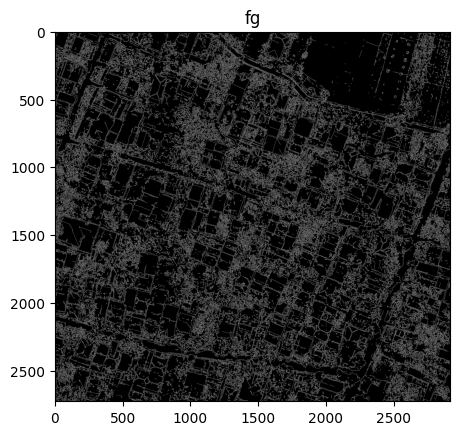

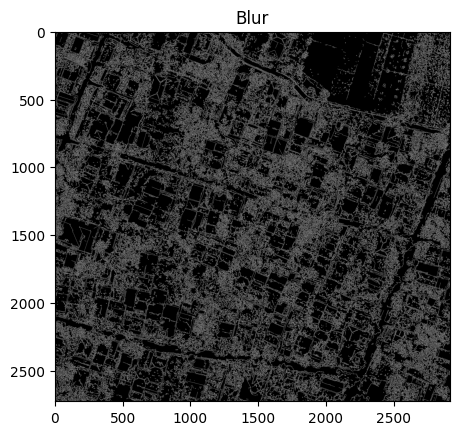

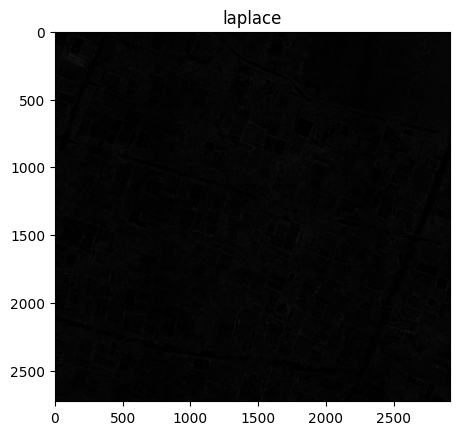

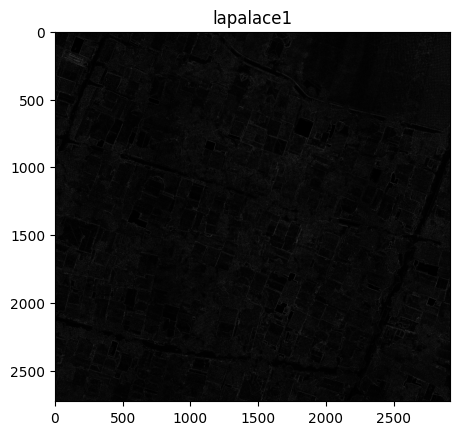

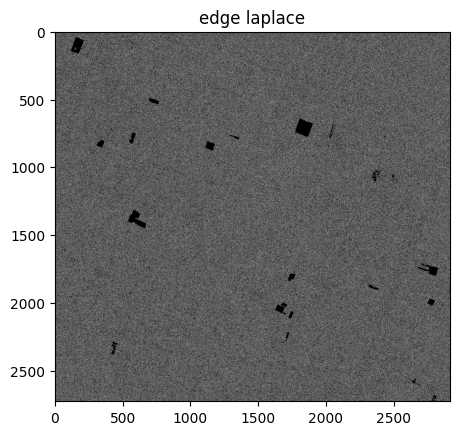

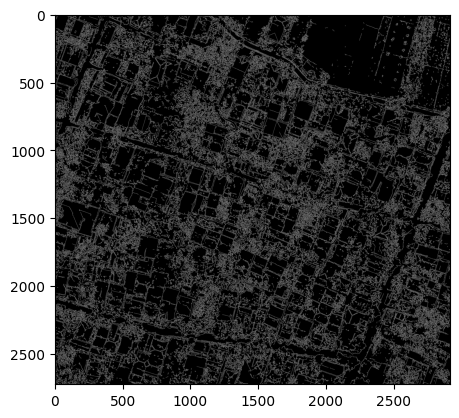

In [10]:
image = cv2.imread(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print (gray)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

fg = cv2.addWeighted(blurred, 1.5, gray, -0.5, 0)
kernel_sharp = np.array((
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]), dtype='int')
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = laplacian.clip(min=0)
print (laplacian)
auto = auto_canny(fg)
auto1 = auto_canny(blurred)
im = cv2.filter2D(auto, -1, kernel_sharp)
# dst = cv2.addWeighted(gray, 0.5, auto, 0.5, 0)
# dst1 = cv2.addWeighted(gray, 0.5, auto1, 0.5, 0)
x = laplacian.astype(np.uint8)
print (x)
auto2 = auto_canny(x)
im1 = cv2.filter2D(auto2, -1, kernel=kernel_sharp)

plt.figure()
plt.title("fg")
plt.imshow(auto, cmap='gray')
plt.figure()
plt.title("Blur")
plt.imshow(auto1, cmap='gray')
plt.figure()
plt.title("laplace")
plt.imshow(laplacian, cmap='gray')
plt.figure()
plt.title("lapalace1")
plt.imshow(x, cmap='gray')
plt.figure()
plt.title("edge laplace")
plt.imshow(im1, cmap='gray')
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
plt.figure("Original")
plt.close()
plt.figure("Nothing")
plt.close()
plt.figure("Blur/Smooth")
plt.close()